# Perceptron multiclase


importar librerias

In [2]:
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import math

## Configuracion de los datos

In [3]:
# Semilla
np.random.seed(11)

In [4]:
#funbcion de salida
def one_hot(a):
  b = -1 * np.ones((a.size, a.max()+1))
  b[np.arange(a.size), a] = 1
  return b

<Figure size 432x288 with 0 Axes>

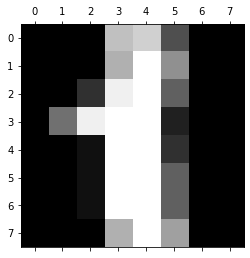

In [5]:
# cargando el dataset de digitos
digits = datasets.load_digits()
plt.gray()
plt.matshow(digits.images[1])

In [6]:
# Codificación one-hot de la etiqueta de destino, Y 
Y = digits.target
Y = one_hot(Y)
Y[1]

array([-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [7]:
# Agregar columna de unos para absorber el sesgo b del hiperplano en X 
X = digits.data
bias_ones = np.ones((len(X), 1))
X = np.hstack((X, bias_ones))

In [8]:
# construccion de los datasets de entrenamiento, validacion y test
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, shuffle=True, test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.12517)

In [9]:
print("Training dataset: ", X_train.shape)
print("Validation dataset: ", X_val.shape)
print("Test dataset: ", X_test.shape)


Training dataset:  (1257, 65)
Validation dataset:  (180, 65)
Test dataset:  (360, 65)


<Figure size 432x288 with 0 Axes>

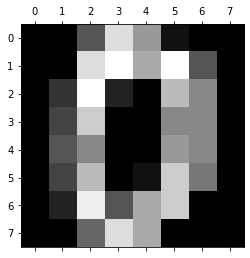

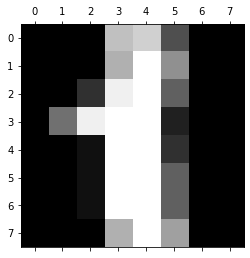

In [10]:
#impresion de 2 digitos de muestra 
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])
plt.show();

In [11]:
#Aquí definimos una función signum
def signum(x):
    if x >=0: return 1
    else : return -1

In [12]:
#funcion general del perceptron

def Perceptron(X_train,Y_train,epochs,lr):
    epoch = 1
    m = 1
    # One vs Rest es un problema de clasificación de dos clases 
    
    w = np.zeros((X_train.shape[1],1))     #Inicializando los pesos como 0 
    
    #Iterando hasta que se alcanzan las iteraciones (épocas) o cuando el error se convierte en 0 
    while(m!=0 and epoch <= epochs):       
        m = 0 
        for xi,yi in zip(X_train,Y_train):  # Iterando sobre cada muestra y la etiqueta de clase correspondiente
            y_hat = signum(np.dot(w.T,xi)[0]) 
                                            
            if yi*y_hat <0:                 #Condición para muestras mal clasificadas 
                w = (w.T + yi*xi).T         ##Actualización de pesos
                m = m + 1                   #Conteo de errores de actualización 
        epoch = epoch + 1                   #Incremento de la iteracion (época)
    return w,m

## entrenamiento del modelo

In [13]:
# Definición de una matriz de peso (Número_de_características * Número de clases) para almacenar cada vector de peso 
weights = np.zeros((X_train.shape[1],Y_train.shape[1])) 

In [14]:
for i in range(Y_train.shape[1]):
    w,err = Perceptron(X_train,Y_train[:,i],100,1)  #Obtener el vector de peso 
    weights[:,i] = w[:,0]                           ##Almacenamiento en la matriz de peso 

## Ajustar el modelo en la validación y luego probar los conjuntos de datos 

In [15]:
#Predecir las clases en base a los vectores de peso 

def predictclass(X_fit,Y_fit,weights):
    predictedclass = np.zeros(X_fit.shape[0])
    for i in range(X_fit.shape[0]):
        for j in range(Y_fit.shape[1]):
            predict = np.dot(weights[:,j],X_fit[i,:]) #Predicción por muestreo 
            if predict >0:
                predictedclass[i] = j
                break
    return predictedclass     #Función para encontrar la precisión 

In [16]:
def accuracy(Y_val,predictedclass):
    error = 0
    numsamples = Y_val.shape[0]
    for i in range(numsamples):
        Actualclass = Y_val[i,:]
        if Actualclass[int(predictedclass[i])]!=1.0:
             error+=1
    return (1-error/numsamples)          #Array de clase predicha para el conjunto de validación 


## Búsqueda de precisiones 

In [17]:
#Precisión para el conjunto de validación 
predictedclass = predictclass(X_val,Y_val,weights)
accuracy(Y_val,predictedclass) * 100

91.11111111111111

In [18]:
#Array de clase predicha para el conjunto de prueba 
predictedclass = predictclass(X_test,Y_test,weights)#Precisión para el conjunto de prueba 
accuracy(Y_test,predictedclass) * 100

89.44444444444444

In [19]:
#Array de clase predicha para el conjunto de entrenamiento 
predictedclass = predictclass(X_train,Y_train,weights)#Precisión para el conjunto de prueba 
accuracy(Y_train,predictedclass) * 100

92.76054097056483

# Prueba

In [20]:
X_train[15]

array([ 0.,  0.,  2., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
        6.,  0.,  0.,  0.,  0.,  5., 15., 13., 11.,  0.,  0.,  0.,  0.,
        0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  3.,
        0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  3.,
        4.,  4., 16.,  2.,  0.,  0.,  2., 15., 13., 14., 13.,  2.,  1.])

In [21]:
Y_train[15]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.])

In [22]:
predictedclass[15]

9.0